<h2><center>Starter Code for Starship Detection</center></h2>

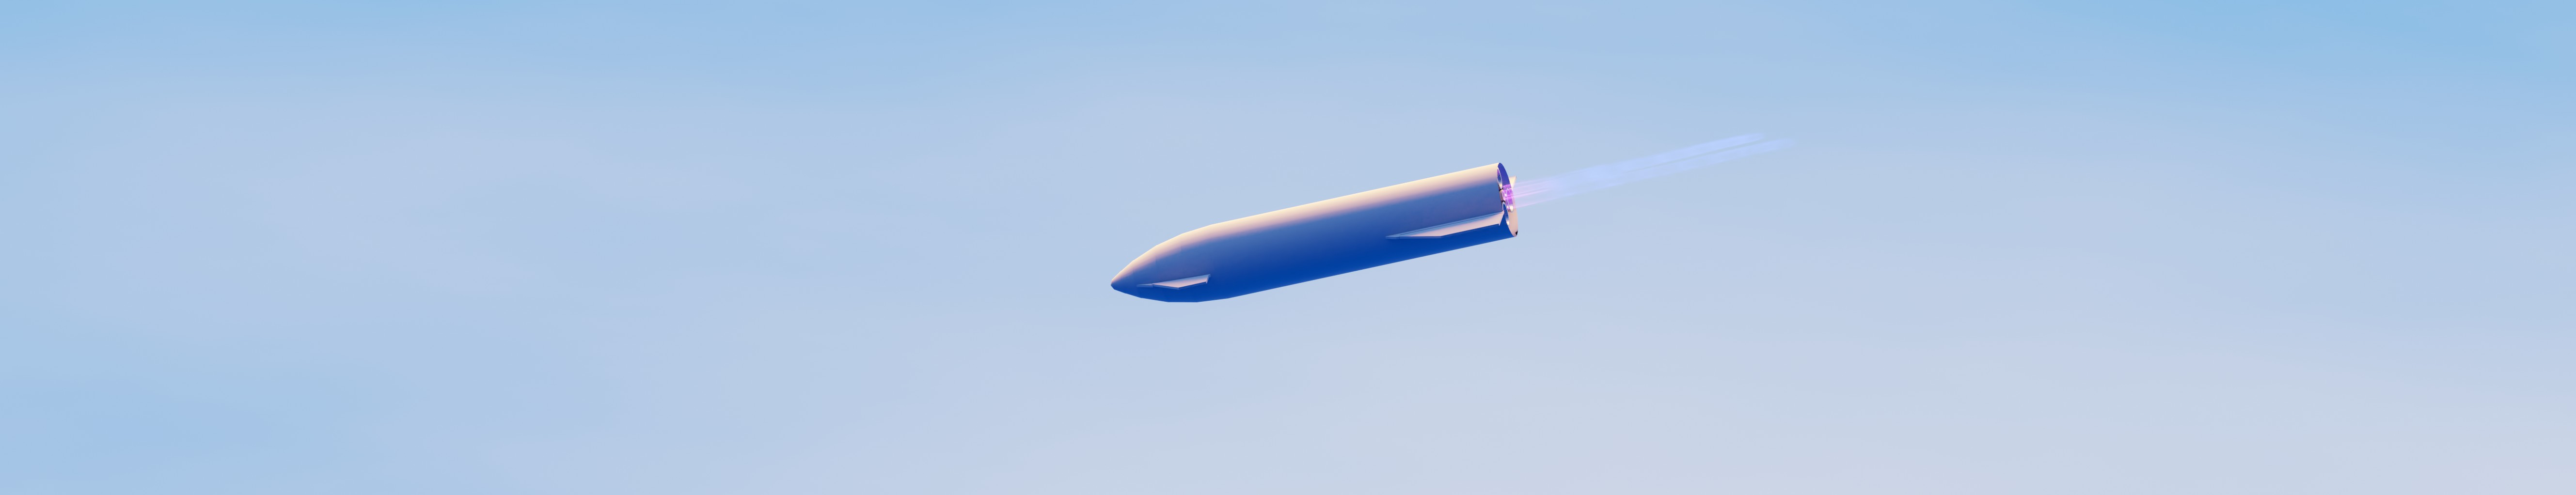

### What we are going to Learn

  - Basic Image Preprocessing with OpenCV 
  - Fixing Contours on an image and getting bounding boxes.  
  - Testing and Submitting the Results to the Challenge. 

**Note : Create a copy of the notebook and use the copy for submission. Go to *File > Save a Copy in Drive* to create a new copy**

# Setting up Environment

### Downloading Dataset

So we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [1]:
!pip install aicrowd-cli

%load_ext aicrowd.magic

     |████████████████████████████████| 43 kB 904 kB/s 
     |████████████████████████████████| 62 kB 653 kB/s 
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 170 kB 8.8 MB/s 
     |████████████████████████████████| 208 kB 9.2 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 5.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have reques

In [2]:
%aicrowd login --api-key c18a6c4b759fa2df29481af274df6942

API Key valid
Saved API Key successfully!


In [3]:
# Downloading the Dataset
!rm -rf data
!mkdir data
%aicrowd ds dl -c starship-detection -o data

data.zip:   0%|          | 0.00/34.1M [00:00<?, ?B/s]

In [4]:
!unzip data/data.zip -d /content/images >> /dev/null

In [5]:
!pip uninstall scikit-image -y
!pip install scikit-image

Found existing installation: scikit-image 0.16.2
Uninstalling scikit-image-0.16.2:
  Successfully uninstalled scikit-image-0.16.2
     |████████████████████████████████| 29.2 MB 2.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Importing Libraries

In [6]:
# Image Reading & Preprocessing
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

# Misc.
import pandas as pd
from tqdm.notebook import tqdm
import os
from natsort import natsorted
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.draw import rectangle
from skimage.measure import find_contours

# Image Preprocessing

In this section we are going to learn some opencv functions which can help us detecting the starship body!

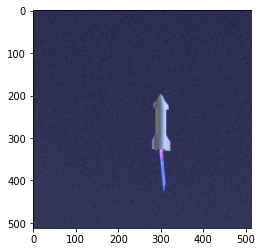

In [116]:
# Reading a Sample Image
img = skimage.io.imread('images/6625.jpg')
plt.imshow(img)

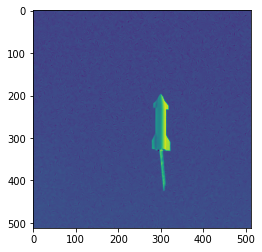

In [117]:
gray = rgb2gray(img)
plt.imshow(gray)

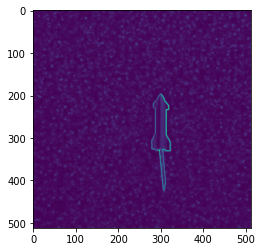

In [123]:
result = sobel(gray)
plt.imshow(result)

0 0 511 511


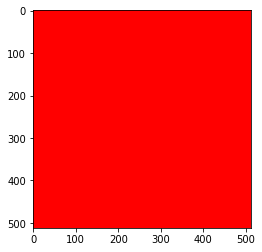

In [124]:
contours = find_contours(result, 0.0001)

def get_bounding_rect(contour):
  x_min = np.min(contour[:, 0])
  x_max = np.max(contour[:, 0])
  y_min = np.min(contour[:, 1])
  y_max = np.max(contour[:, 1])
  return round(x_min), round(y_min), round(x_max), round(y_max)

def draw_rect(img, points, color=[255, 0, 0]):
  # Make sure the coordinates are expressed as integers
  rr, cc = rectangle(start=points[:2], end=points[2:])
  img[rr, cc] = color
  return img

x_min = 512
y_min = 512
x_max = 0
y_max = 0
draw_img = img.copy()
for contour in contours:
  points = get_bounding_rect(contour)
  x_min = min(x_min, points[0])
  y_min = min(y_min, points[1])
  x_max = max(x_max, points[2])
  y_max = max(y_max, points[3])
print(x_min, y_min, x_max, y_max)
draw_img = draw_rect(draw_img, [x_min, y_min, x_max, y_max])
plt.imshow(draw_img)

### Countours

Contours are lines joining along the bounding of a intensity or color in an image. In the canny image or the original image, we see that the starship has much different color as compared to the sky. 

So as you can see, fnding contours did a pretty great job in finfing the starship body. However there are some mistakes with the image in such as the more right side of the starship body in left unchecked.

# Submitting Results 📄

In [53]:
# Getting all the testing images 
test_imgs = natsorted(os.listdir("images"))
print(len(test_imgs))

10000


In [113]:
# Function to generate the bounding boxes
def gen_bounding_boxes(img):

  # Converting the image to numpy array 
  gray = rgb2gray(img)
  result = sobel(gray)

  contours = find_contours(result, 0.05)

  def get_bounding_rect(contour):
    x_min = np.min(contour[:, 0])
    x_max = np.max(contour[:, 0])
    y_min = np.min(contour[:, 1])
    y_max = np.max(contour[:, 1])
    return round(x_min), round(y_min), round(x_max), round(y_max)

  def draw_rect(img, points, color=[255, 0, 0]):
    # Make sure the coordinates are expressed as integers
    rr, cc = rectangle(start=points[:2], end=points[2:])
    img[rr, cc] = color
    return img

  x_min = 512
  y_min = 512
  x_max = 0
  y_max = 0
  draw_img = img.copy()
  for contour in contours:
    points = get_bounding_rect(contour)
    x_min = min(x_min, points[0])
    y_min = min(y_min, points[1])
    x_max = max(x_max, points[2])
    y_max = max(y_max, points[3])

  return y_min, x_min, y_max - y_min, x_max - x_min

In [114]:
bboxes = []
image_ids = []

# Ground through each test image
for img_name in tqdm(test_imgs):

  # Reading the test image
  img = skimage.io.imread(os.path.join("images", img_name))

  # Generating the bounding boxes
  x,y,w,h = gen_bounding_boxes(img)

  # Adding the boundong boxes and image id
  bboxes.append([x,y,w,h])
  image_ids.append(int(img_name.split(".")[0]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [127]:
fill = True
xs = []
ys = []
ws = []
hs = []
missing_idxes = []
for idx, bbox in enumerate(bboxes):
  x, y, w, h = bbox
  if x == 512 or x == 0 or y == 512 or y == 0 or w <=0 or h <= 0:
    print(idx)
    missing_idxes.append(idx)
  else:
    xs.append(x)
    ys.append(y)
    ws.append(w)
    hs.append(h)
if fill:
  x_mean = sum(xs) / len(xs)
  y_mean = sum(ys) / len(ys)
  w_mean = sum(ws) / len(ws)
  h_mean = sum(hs) / len(hs)
  for idx in missing_idxes:
    bboxes[idx] = [x_mean, y_mean, w_mean, h_mean]

In [ ]:
from PIL import Image, ImageDraw

def visualize(index):
  image_id = image_ids[index]
  bbox = bboxes[index]
  x, y, w, h = bbox
  draw_img = Image.open(f"images/{image_id}.jpg")
  draw = ImageDraw.Draw(draw_img)
  draw.rectangle([x, y, x+w, y+h], outline ="red")
  return draw_img

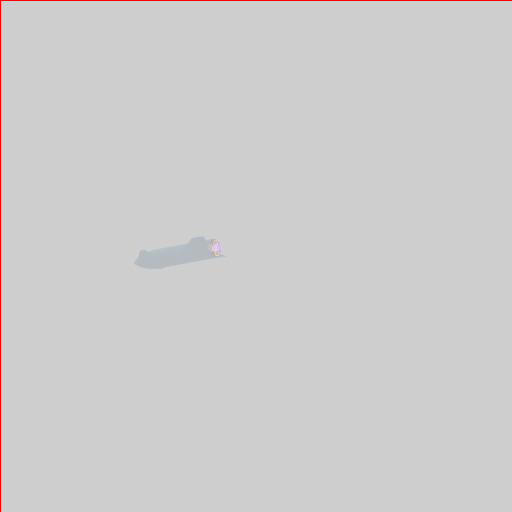

In [96]:
visualize(182)

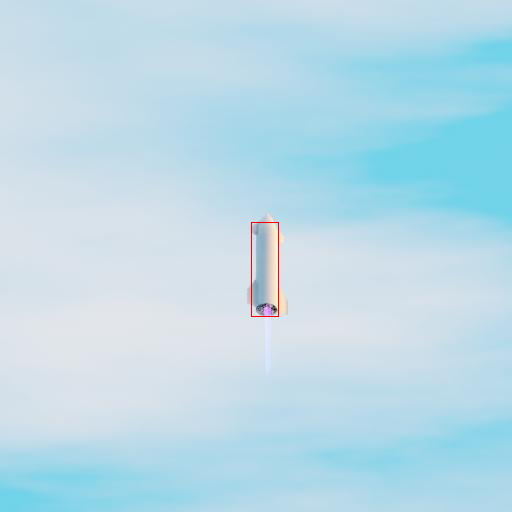

In [79]:
visualize(2)

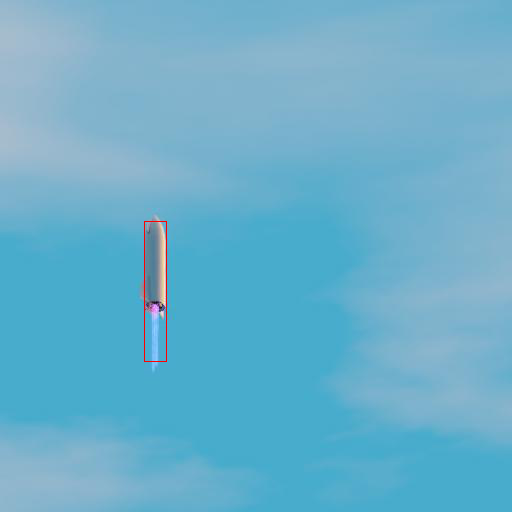

In [80]:
visualize(100)

In [ ]:
def merge_boxes(boxes):
  

In [81]:
# Adding the image id and bounding boxes to a dataframe
df = pd.DataFrame({"ImageID":image_ids, "bbox":bboxes})
df = df.sort_values("ImageID").reset_index(drop=True)
df

ImageID                 bbox
0           0   [167, 215, 20, 98]
1           1  [273, 227, 128, 41]
2           2   [251, 222, 27, 94]
3           3  [203, 242, 169, 34]
4           4  [321, 214, 34, 104]
...       ...                  ...
9995     9995  [204, 239, 183, 28]
9996     9996   [182, 244, 67, 21]
9997     9997   [95, 207, 203, 81]
9998     9998   [159, 237, 22, 80]
9999     9999  [164, 215, 25, 113]

[10000 rows x 2 columns]

In [86]:
!rm -rf assets
!mkdir assets

df.to_csv(os.path.join("assets", "submission.csv"), index=False)

**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

## Uploading the Results

Using notebook: /content/drive/MyDrive/Colab Notebooks/Starship Detection SKImage for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 785.2/783.5 KB • 1.3 MB/s • 0:00:00
                                                  ╭─────────────────────────╮                                                   
                                                  │ Successfully submitted! │                                                   
                                                  ╰─────────────────────────╯                                                   
                                                        Important links                                                         
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-x/problems/stars